<a href="https://colab.research.google.com/github/Gipedroso1997/Praticas_curso/blob/main/Sele%C3%A7%C3%A3o_de_im%C3%B3vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*META:* Achar o melhor custo benefício

**Premissas: Escolher imóveis de acordo com a características solicitadas:**
Não é necessário ter vaga de garagem, deve aceitar PETS, aluguel menor que 4000 e de 2 ou 3 quartos.

In [57]:
import pandas as pd
import numpy as np

In [58]:
from google.colab import files
upload = files.upload()

Saving houses_rent.xlsx to houses_rent (1).xlsx


In [61]:
aluguel_casa = pd.read_excel(upload['houses_rent (1).xlsx'])

<ipython-input-61-d6a5917a4844>:1: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  aluguel_casa = pd.read_excel(upload['houses_rent (1).xlsx'])


In [62]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [63]:
aluguel_casa.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [ ]:
aluguel_casa = aluguel_casa.rename(columns={"parking spaces":"parking_spaces", "rent amount": "rent_amount", "property tax": "property_tax", "fire insurance": "fire_insurance"})

In [ ]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
aluguel_casa.dtypes

,0
index,int64
city,object
area,int64
rooms,int64
bathroom,int64
parking_spaces,int64
floor,object
animal,object
furniture,object
hoa,object


In [ ]:
aluguel_casa = aluguel_casa.astype({"rent_amount": "float", "property_tax":"float", "fire_insurance": "float", "total":"float"})

**ESTATÍSTICA**

Entendendo os dados

In [ ]:
aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [ ]:
aluguel_casa[["area","rooms","bathroom","parking_spaces","property_tax","rent_amount","fire_insurance","total"]].describe()

,area,rooms,bathroom,parking_spaces,property_tax,rent_amount,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,490.533224,4395.844408,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,6212.549484,3576.668946,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,0.000000,420.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,34.000000,1800.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,145.000000,3111.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,458.000000,5952.500000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,366300.000000,45000.000000,677.000000,372700.000000


In [ ]:
aluguel_casa = aluguel_casa[(aluguel_casa["total"]<=4000)]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200.0,41.0,16.0,1257.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0


In [ ]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,3059.331615,78.085911,1.881100,1.433333,0.896907,1859.978694,80.113058,24.114089,2397.613746
std,1751.583422,240.046113,0.828103,0.691392,0.947772,722.193067,98.129845,10.851384,859.232581
min,1.000000,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1529.500000,45.000000,1.000000,1.000000,0.000000,1300.000000,0.000000,16.000000,1696.250000
50%,3063.500000,60.000000,2.000000,1.000000,1.000000,1800.000000,50.000000,23.000000,2391.000000
75%,4579.500000,86.750000,2.000000,2.000000,1.000000,2350.000000,117.000000,31.000000,3074.750000
max,6079.000000,12732.000000,6.000000,6.000000,8.000000,3915.000000,850.000000,59.000000,4000.000000


In [ ]:
aluguel_casa = aluguel_casa[ (aluguel_casa["total"] <= 4000) & (aluguel_casa["animal"] == "accept") ]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
5,5,Barcelona,13,1,1,0,2,accept,not furnished,0,2200.0,42.0,28.0,2270.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0


In [ ]:
aluguel_casa = aluguel_casa[((aluguel_casa["total"] <= 4000) & (aluguel_casa["animal"] == "accept")) & ((aluguel_casa["rooms"]==2)|(aluguel_casa["rooms"]==3))]
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [ ]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


**MÉTODO QUERY**

In [77]:
aluguel_casa = aluguel_casa.query("total <= 4000 & animal == 'accept' & (rooms == 2 | rooms == 3)")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800,250,23,3443
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200,192,28,3170


In [ ]:
agg_city_price = aluguel_casa.groupby("city")["total"].mean().reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [ ]:
agg_bath_room_price = aluguel_casa.groupby(["bathroom","rooms"])["total"].mean().reset_index()
agg_bath_room_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


In [64]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [ ]:
import seaborn as sns

[Text(0.5, 0, 'qtde quartos'), Text(0, 0.5, 'media do preço')]

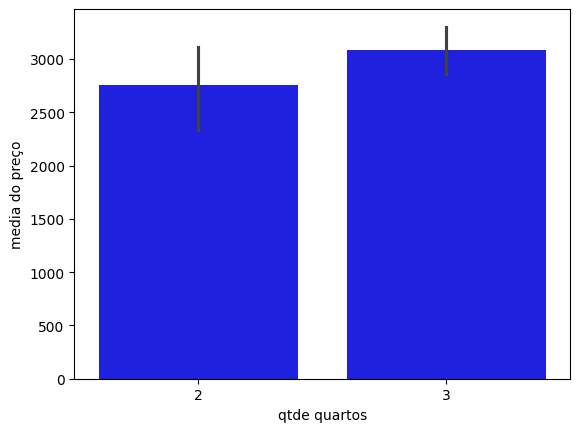

In [ ]:
ax = sns.barplot(data=agg_bath_room_price, x="rooms", y="total",color= "blue")
ax.set(xlabel = "qtde quartos", ylabel = "media do preço")

In [ ]:
agg_area = agg_area.query("area <= 100")
agg_area.describe()

,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


<Axes: xlabel='area', ylabel='Count'>

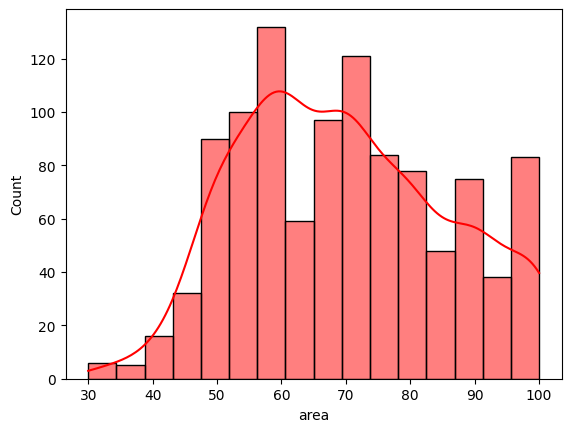

In [ ]:
sns.histplot(data=agg_area, x="area", kde=True,color="red")

In [ ]:
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


Apartamentos no Porto com valores menores

<Axes: xlabel='total', ylabel='Count'>

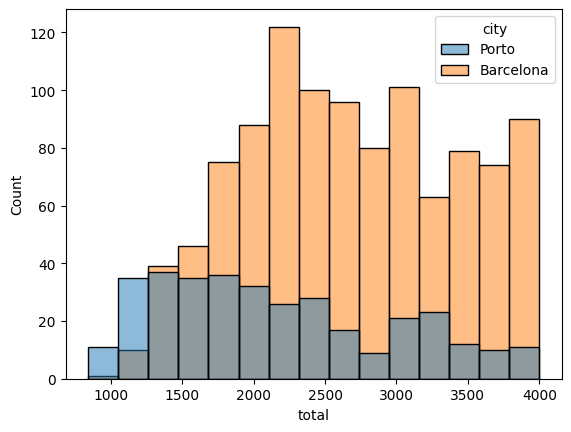

In [ ]:
sns.histplot(data=aluguel_casa, x="total",hue="city")

In [65]:
aluguel_casa = aluguel_casa.query('city == "Porto"') # Pass the condition as a string
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
10,10,Porto,60,1,1,0,6,accept,not furnished,480,720,20,10,1230
11,11,Porto,64,1,2,1,4,accept,furnished,406,1550,0,7,1963
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950,11,13,1319
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010,584,46,3640


In [66]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking spaces,rent amount,property tax,fire insurance,total
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,3035.566787,143.867629,2.392298,2.019254,1.630566,2506.210590,157.926594,34.364621,3354.521059
std,1778.156684,455.138673,1.089993,1.400384,1.535752,2415.683404,215.065069,34.804939,2961.417481
min,1.000000,20.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,736.000000
25%,1472.500000,55.000000,1.500000,1.000000,1.000000,1000.000000,34.500000,13.000000,1476.000000
50%,3060.000000,77.000000,2.000000,1.000000,1.000000,1600.000000,79.000000,21.000000,2245.000000
75%,4543.500000,146.500000,3.000000,2.500000,2.000000,3075.000000,185.500000,42.000000,3937.500000
max,6077.000000,12732.000000,7.000000,7.000000,8.000000,15000.000000,1898.000000,226.000000,20560.000000


In [71]:
aluguel_casa.groupby("floor").index.nunique().sort_values(ascending=False)

,index
floor,
-,205
1,89
3,85
2,72
4,62
7,45
5,44
6,41
8,33


In [73]:
agg_floor_price = aluguel_casa.groupby("floor")["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2859.820225
1,2,2514.583333
2,3,1952.364706
3,4,2423.854839
4,5,3261.886364
5,6,3176.243902
6,7,2640.311111
7,8,3495.333333
8,9,3625.533333
9,10,3405.045455


<Axes: xlabel='floor', ylabel='total'>

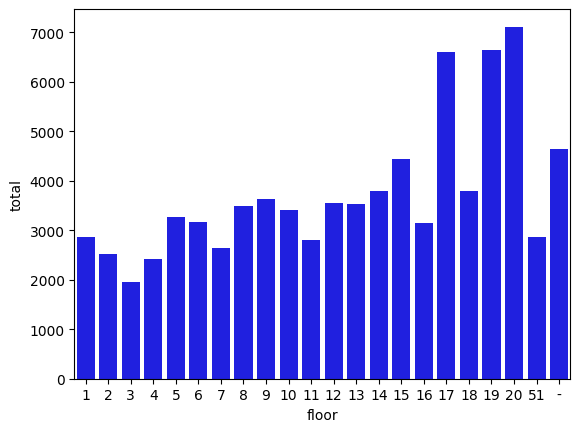

In [74]:
sns.barplot(data = agg_floor_price, x="floor", y="total",color="blue")

In [78]:
sixteenth_floor=aluguel_casa.query("floor == 16")
sixteenth_floor

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900,61,12,1523
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200,89,16,2035


**INSIGHTs**

Ambos adotam as premissas.
A primeira opção não tem garagem, mas possue uma área maior, além de ser mais em conta. Selecionar a 1 opção